In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
# from ipywidgets import IProgress

In [2]:
df = pd.read_csv('../example_data/wp_log_peyton_manning.csv')

In [3]:
m = NeuralProphet(
    n_lags=100,
    n_changepoints=100,
    trend_reg=1,
    n_forecasts=100,
)
metrics = m.fit(df, freq="D", validate_each_epoch=0.1)
# metrics = m.fit(df, freq="D", plot_live_loss=True, validate_each_epoch=0.1)
metrics

INFO: nprophet.config - __post_init__: Note: Trend changepoint regularization is experimental.
INFO: nprophet - _handle_missing_data: 59 missing dates were added.
INFO: nprophet - _handle_missing_data: 59 NaN values in column y were auto-imputed.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E-01
Epoch[1/40]:   2%|▎         | 1/40 [00:00<00:07,  5.23it/s, SmoothL1Loss=0.53, MAE=4.66, RegLoss=0.0112, MAE_val=4.26, SmoothL1Loss_val=0.453]

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


Epoch[40/40]: 100%|██████████| 40/40 [00:08<00:00,  4.93it/s, SmoothL1Loss=0.00528, MAE=0.373, RegLoss=0.00319, MAE_val=0.316, SmoothL1Loss_val=0.00392]


,SmoothL1Loss,MAE,RegLoss,SmoothL1Loss_val,MAE_val
0,0.529957,4.660971,0.011164,0.453362,4.263800
1,0.199229,2.605916,0.010495,0.092498,1.775600
2,0.044750,1.176655,0.009603,0.038368,1.195683
3,0.019363,0.772378,0.008315,0.036269,1.168995
4,0.023277,0.830849,0.007015,0.021575,0.875234
5,0.049095,1.252623,0.006870,0.907445,7.154755
6,0.313286,3.404690,0.006988,0.611590,5.454586
7,0.411306,4.087023,0.006074,0.568150,5.298938
8,0.404141,3.979661,0.005748,0.366655,3.656152
9,0.108419,1.806440,0.005105,0.975927,7.504422


INFO: nprophet - _handle_missing_data: 59 missing dates were added.
INFO: nprophet - _handle_missing_data: 59 NaN values in column y were auto-imputed.


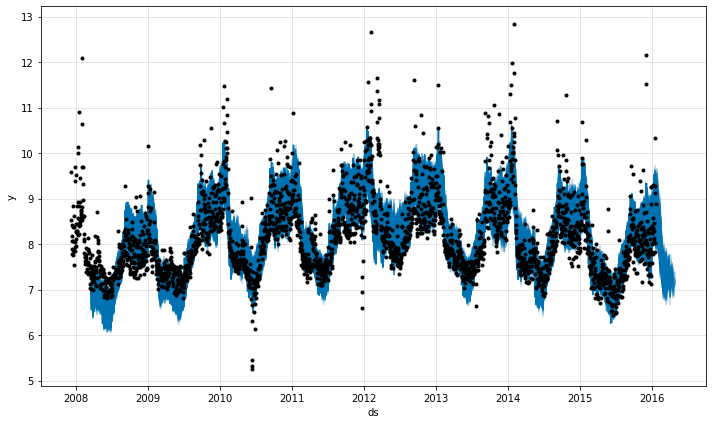

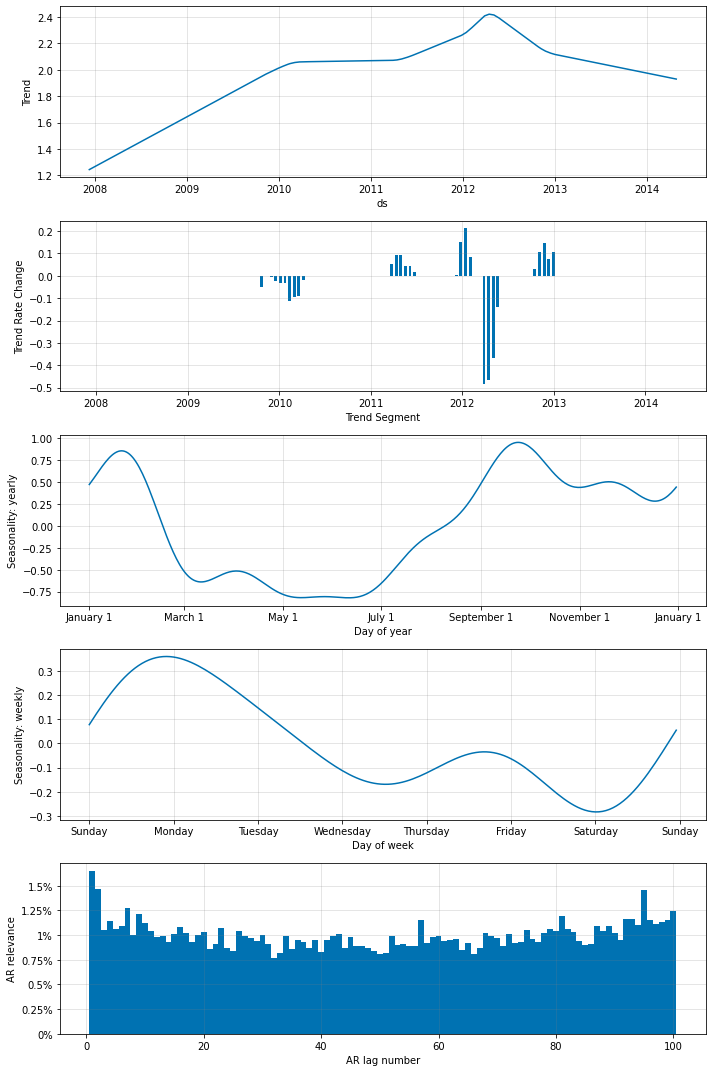

In [4]:
future = m.make_future_dataframe(df, periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig = m.plot(forecast)
fig_param = m.plot_parameters()